# Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [219]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [220]:
# reading the data

In [221]:
data = pd.read_csv('houses_Madrid.csv')
data.head(2)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.00,60.00,2,1.00,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,"1,960.00",NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.00,NaN,3,1.00,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
# Exploring the Data

In [223]:
data.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parki

In [224]:
data['house_type_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21742 entries, 0 to 21741
Series name: house_type_id
Non-Null Count  Dtype 
--------------  ----- 
21351 non-null  object
dtypes: object(1)
memory usage: 170.0+ KB


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [ ]:
# Trying to know if the rent and buy price is valid or not
# the rent price values is not valid

In [227]:
data['is_rent_price_known'].value_counts()

is_rent_price_known
False    21742
Name: count, dtype: int64

In [228]:
data['is_buy_price_known'].value_counts() 

is_buy_price_known
True    21742
Name: count, dtype: int64

In [229]:
data['house_type_id'].unique() 

array(['HouseType 1: Pisos', 'HouseType 4: Dúplex', nan,
       'HouseType 5: Áticos', 'HouseType 2: Casa o chalet'], dtype=object)

In [230]:
data['is_new_development'].value_counts() 

is_new_development
False    19281
True      1469
Name: count, dtype: int64

In [231]:
data[['house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   house_type_id           21351 non-null  object 
 1   is_renewal_needed       21742 non-null  bool   
 2   is_new_development      20750 non-null  object 
 3   built_year              10000 non-null  float64
 4   has_central_heating     13608 non-null  object 
 5   has_individual_heating  13608 non-null  object 
 6   are_pets_allowed        0 non-null      float64
 7   has_ac                  11211 non-null  object 
 8   has_fitted_wardrobes    13399 non-null  object 
 9   has_lift                19356 non-null  object 
 10  is_exterior             18699 non-null  object 
 11  has_garden              1556 non-null   object 
 12  has_pool                5171 non-null   object 
 13  has_terrace             9548 non-null   object 
 14  has_balcony             3321 non-null 

In [232]:
data[['has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   has_private_parking           0 non-null      float64
 1   has_public_parking            0 non-null      float64
 2   is_parking_included_in_price  7719 non-null   object 
 3   parking_price                 7719 non-null   float64
 4   is_orientation_north          11358 non-null  object 
 5   is_orientation_west           11358 non-null  object 
 6   is_orientation_south          11358 non-null  object 
 7   is_orientation_east           11358 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [233]:
# dividing the date into to dataframe because some columns have many valus null and other not; if we deleting all rows which has null we will lose a huge quantity of the date
# the df has the largest number of data
# i will cleaning each datafarame individually then andalys each data and on SQl i will join between the 2 datas when needed

In [352]:
df= data[['id','title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price', 
          'buy_price_by_area', 'house_type_id', 'is_renewal_needed', 'built_year', 'has_parking']]

In [323]:
df1= data [['id','sq_mt_built', 'buy_price', 'floor', 'is_floor_under',
             'has_lift', 'is_exterior' ,'is_new_development']]

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   title              21742 non-null  object 
 2   subtitle           21742 non-null  object 
 3   sq_mt_built        21616 non-null  float64
 4   n_rooms            21742 non-null  int64  
 5   n_bathrooms        21726 non-null  float64
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
 8   house_type_id      21351 non-null  object 
 9   is_renewal_needed  21742 non-null  bool   
 10  has_parking        21742 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 1.5+ MB


In [237]:
df.isnull().sum()

id                     0
title                  0
subtitle               0
sq_mt_built          126
n_rooms                0
n_bathrooms           16
buy_price              0
buy_price_by_area      0
house_type_id        391
is_renewal_needed      0
has_parking            0
dtype: int64

In [238]:
# deleting the nan values from sq_mt_built and house_type_id

In [338]:
df = df.dropna(subset=['sq_mt_built'])

In [339]:
df = df.dropna(subset=['house_type_id'])

In [241]:
df.isnull().sum()

id                    0
title                 0
subtitle              0
sq_mt_built           0
n_rooms               0
n_bathrooms          14
buy_price             0
buy_price_by_area     0
house_type_id         0
is_renewal_needed     0
has_parking           0
dtype: int64

In [242]:
# Instead of deleting the nan values of number of bathrooms is used the mode as there were no house without bathroom

In [340]:
df['n_bathrooms'].mode()

0   1.00
Name: n_bathrooms, dtype: float64

In [341]:
df['n_bathrooms'].fillna(1, inplace= True)

C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\3485364854.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [342]:
# Rename the column
df.rename(columns= {'subtitle' : 'city'}, inplace= True)

In [343]:
# split city column to (district, city)
df['district']= df.city.str.split(',', expand = True)[0]
df['district']. head()

0    San Cristóbal
1      Los Ángeles
2       San Andrés
3       San Andrés
4      Los Rosales
Name: district, dtype: object

In [247]:
# I found there were number of rooms are zere
df['n_rooms'].describe()

count   21,225.00
mean         3.03
std          1.42
min          0.00
25%          2.00
50%          3.00
75%          4.00
max         24.00
Name: n_rooms, dtype: float64

In [248]:
df.sample(2)

,id,title,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,has_parking,district
21164,578,Piso en venta en calle Alverja,"Lucero, Madrid",80.00,2,1.00,189000,2362,HouseType 1: Pisos,True,False,Lucero
6426,15316,Piso en venta en calle Azor,"Campamento, Madrid",65.00,3,1.00,126000,1938,HouseType 1: Pisos,False,False,Campamento


In [249]:
df[df['n_rooms'] == 0].sample(2)

,id,title,city,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,has_parking,district
2863,18879,"Dúplex en venta en paseo Dirección, 5","Berruguete, Madrid",185.00,0,2.00,550000,2973,HouseType 4: Dúplex,False,False,Berruguete
18515,3227,Piso en venta en Huertas-Cortes,"Centro, Madrid",125.00,0,1.00,300000,2400,HouseType 1: Pisos,True,False,Centro


In [ ]:
# When searching the original data we found on the title Estudio and have 0 number of rooms, which makes sense.
# But in the split data, the zero rooms aren't "Estudio," so I'll delete them.

In [344]:
df = df[~((df['n_rooms'] == 0) & (~df['title'].str.contains('Estudio', case=False, na=False)))]

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21171 entries, 0 to 21741
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21171 non-null  int64  
 1   title              21171 non-null  object 
 2   city               21171 non-null  object 
 3   sq_mt_built        21171 non-null  float64
 4   n_rooms            21171 non-null  int64  
 5   n_bathrooms        21171 non-null  float64
 6   buy_price          21171 non-null  int64  
 7   buy_price_by_area  21171 non-null  int64  
 8   house_type_id      21171 non-null  object 
 9   is_renewal_needed  21171 non-null  bool   
 10  has_parking        21171 non-null  bool   
 11  district           21171 non-null  object 
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 1.8+ MB


In [ ]:
# dividing the buy price values into three categories
df['price_category']= pd.qcut(df['buy_price'], q=3, labels= ['Low', 'Medium', 'High'])

# transforming the datafram inot CSV file 

In [253]:
df.to_csv('Madrid_cleaned_data.csv')

In [254]:
df= pd.read_csv('Madrid_cleaned_data.csv')


# Exploratory Data Analysis (EDA)

In [256]:
# using a customized palette
dark_colors = [ '#2c115f', '#721f81', '#b63679', '#f1605d', '#fca636', '#fcffa4']
sns.set_palette(dark_colors)

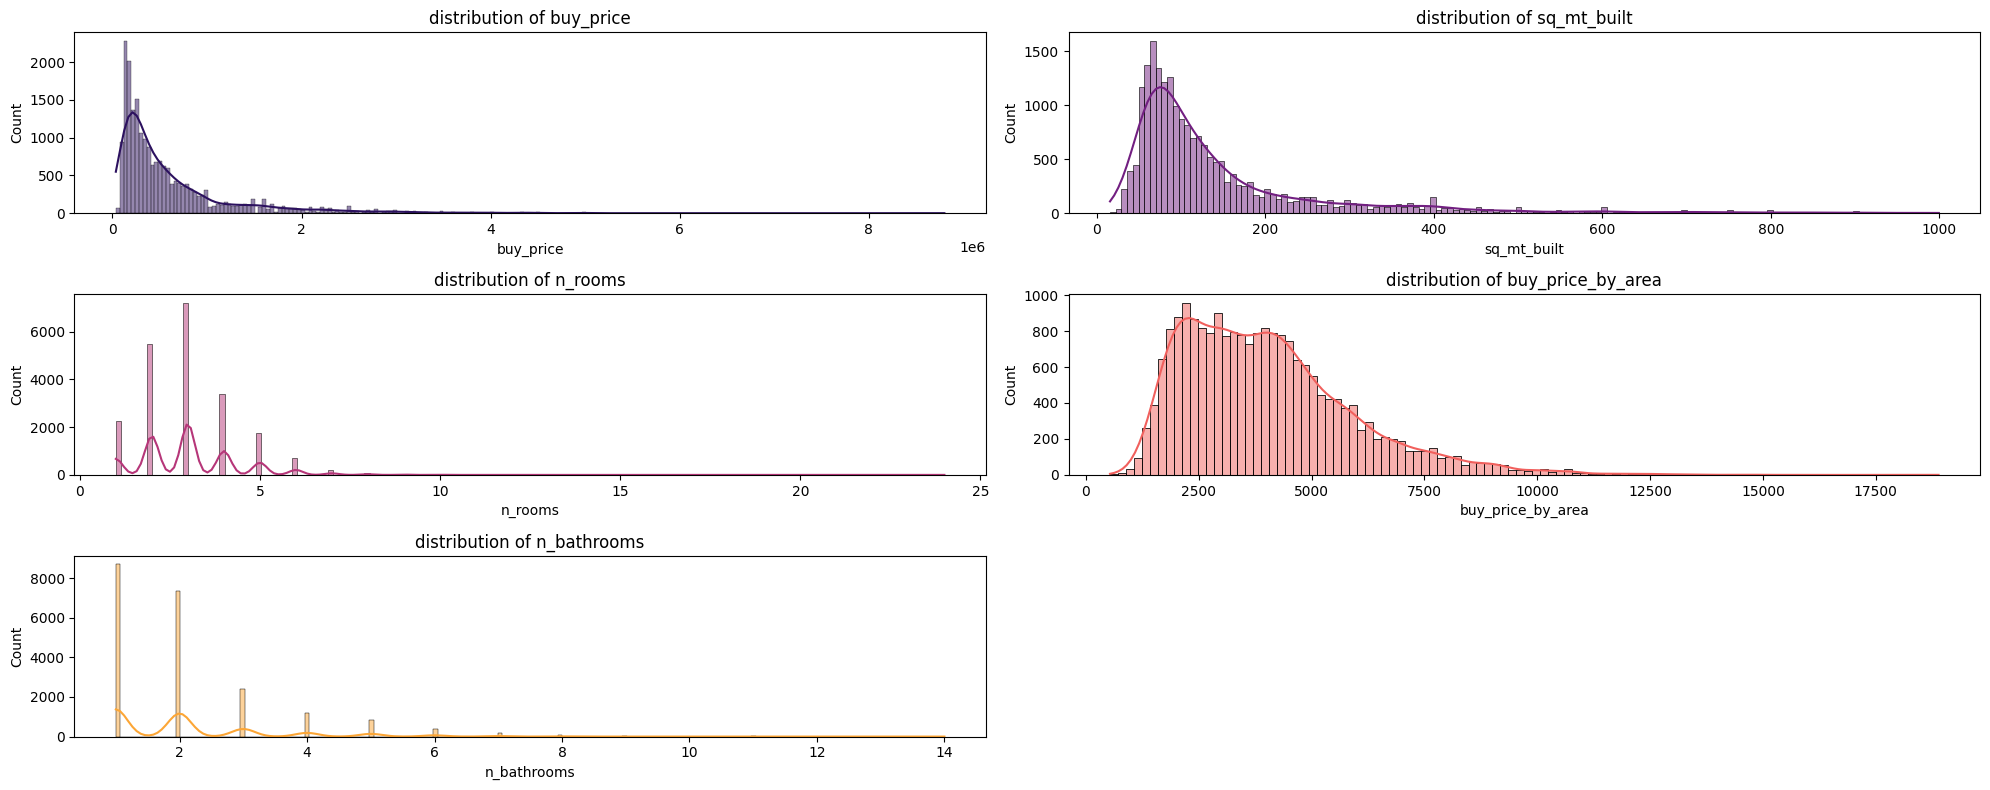

In [ ]:
#showing the count of values in all numeric columns using hisplots
num_columns = ['buy_price', 'sq_mt_built', 'n_rooms', 'buy_price_by_area', 'n_bathrooms']

plt.figure(figsize=(20,8))
for i, c in enumerate(num_columns):
    plt.subplot(3, 2, i+1)
    plt.title('distribution of ' + c)
    sns.histplot(df[c], kde = True, color= dark_colors[i % len(dark_colors)])
    plt.tight_layout()

In [258]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'city', 'sq_mt_built', 'n_rooms',
       'n_bathrooms', 'buy_price', 'buy_price_by_area', 'house_type_id',
       'is_renewal_needed', 'has_parking', 'district', 'price_category'],
      dtype='object')

In [260]:
fig= px.bar(df['district'].value_counts(), title= 'Districts in Madrid', color_discrete_sequence= dark_colors)
fig.show()

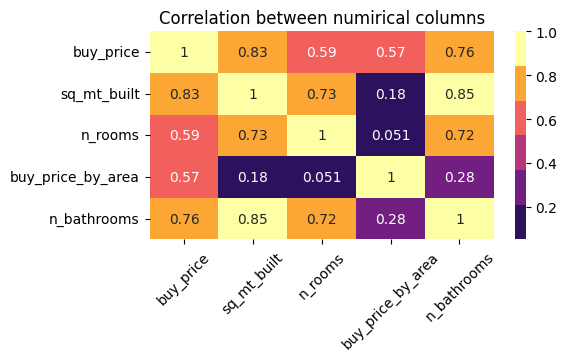

In [ ]:
# making a correlation to know which numeric columns are trurly effect on price or effect on each other
num_corr= df[num_columns].corr()
plt.figure(figsize= (6,4))
sns.heatmap(num_corr, annot = True, cmap= dark_colors)
plt.title('Correlation between numirical columns')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()
# Strong postinve correlation between buy price and (sq_mt_built, n_bathrooms), sq_mt_built and (n_rooms, n_bathrooms), n_rooms and n_bathrooms
# psitive correlation between buy price and n_rooms, buy price and buy price_by_area
# week correlation between  buy price_by_area and ( sq_mt_built,  and n_rooms,  n_bathrooms)

In [262]:
# the chart explain the good relation between teh buy price and the sq_mt_built
fig1= px.scatter(df, x= 'sq_mt_built', y= 'buy_price', 
                 size= 'sq_mt_built', title= 'Buy price by built', 
                 color_discrete_sequence=dark_colors)
fig1.update_layout(width= 600, height= 400)
fig1.show()

In [263]:
#buy price and number of rooms 
fig2= px.box(df[df['buy_price'] < 700000], x= 'n_rooms', y= 'buy_price', 
              title= 'Buy price number of rooms', 
              color_discrete_sequence=dark_colors)
fig2.update_layout(width= 600, height= 400)
fig2.show()             

In [264]:
district_price= df.groupby('district')['buy_price_by_area'].median().sort_values(ascending=False).head(20).reset_index()

C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\2267555427.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\2267555427.py:2: UserWarning:


The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.



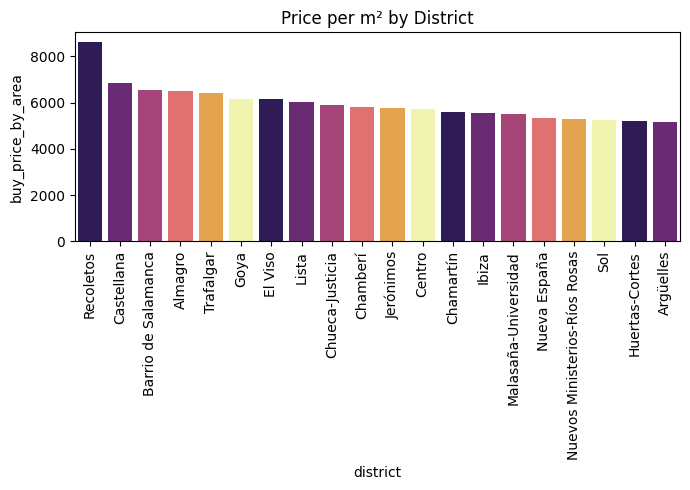

In [265]:
plt.figure(figsize= (7,5))
sns.barplot(district_price, x='district', y='buy_price_by_area', palette=dark_colors)
plt.xticks(rotation=90)
plt.title('Price per m² by District')
plt.tight_layout()
plt.show()
# Chart explain that Recolotus is the hightes district in price by the area 

C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\385663070.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\385663070.py:3: UserWarning:


The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.



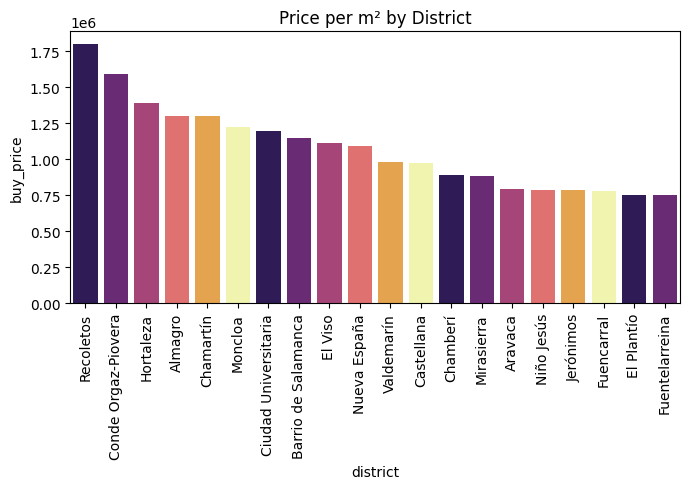

In [266]:
price_district= df.groupby('district')['buy_price'].median().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize= (7,5))
sns.barplot(price_district, x='district', y='buy_price', palette=dark_colors)
plt.xticks(rotation=90)
plt.title('Price per m² by District')
plt.tight_layout()
plt.show()
# Recoletos also is the higest but the other districts are not the same in relation with area
# there are many factors effect on the price not only the district as St_mt_built so in this case using the area is more valid

In [267]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'city', 'sq_mt_built', 'n_rooms',
       'n_bathrooms', 'buy_price', 'buy_price_by_area', 'house_type_id',
       'is_renewal_needed', 'has_parking', 'district', 'price_category'],
      dtype='object')

C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\739653639.py:2: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



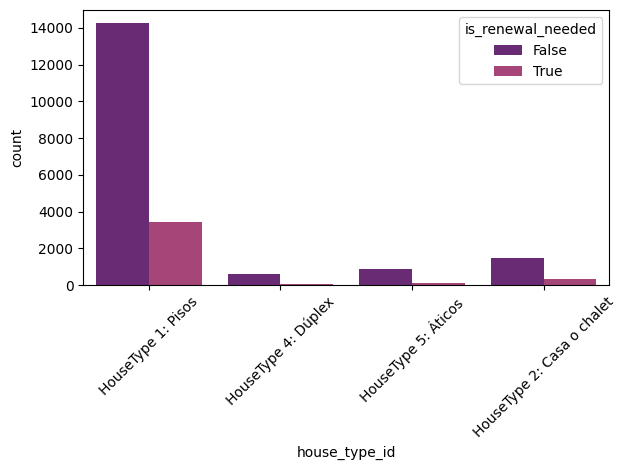

In [ ]:
# counting the number of each type and showing if it need renewal or not
sns.countplot(df, x= 'house_type_id',  hue= 'is_renewal_needed', palette= dark_colors[1:6])
plt.xticks(rotation = 45)
plt.tight_layout()
# the highest portion for the pisos and most of them are not need to renewal 

In [270]:
df.groupby(['house_type_id'])['buy_price'].median().sort_values(ascending= False)
# House or chalet has the highest average of prices

house_type_id
HouseType 2: Casa o chalet   1,400,000.00
HouseType 5: Áticos            599,500.00
HouseType 4: Dúplex            520,000.00
HouseType 1: Pisos             330,000.00
Name: buy_price, dtype: float64

In [271]:
count= df['house_type_id'].value_counts()


In [ ]:

fig3= px.pie(names= count.index, values= count.values, 
             color_discrete_sequence= dark_colors, title = 'Distribution of House Types')
fig3.update_layout(height = 400, width= 600)
fig3.update_traces(textinfo= 'percent')
fig3.show()
# pie chart explain that pisos has 83.5% from total counts

In [274]:
df.groupby('district')['buy_price_by_area'].median().sort_values(ascending=False).head(5).reset_index()

,district,buy_price_by_area
0,Recoletos,"8,615.00"
1,Castellana,"6,872.00"
2,Barrio de Salamanca,"6,556.00"
3,Almagro,"6,499.00"
4,Trafalgar,"6,419.00"


In [275]:
renewal= df[df['is_renewal_needed']== True]
renewal.groupby('district')['buy_price_by_area'].median().sort_values(ascending=False).head(5).reset_index()

,district,buy_price_by_area
0,Recoletos,"7,182.50"
1,Barrio de Salamanca,"6,005.00"
2,El Viso,"5,882.00"
3,Almagro,"5,826.00"
4,Castellana,"5,673.00"


In [276]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'city', 'sq_mt_built', 'n_rooms',
       'n_bathrooms', 'buy_price', 'buy_price_by_area', 'house_type_id',
       'is_renewal_needed', 'has_parking', 'district', 'price_category'],
      dtype='object')

In [277]:
df.groupby('house_type_id')['has_parking'].mean().sort_values(ascending = False)
# House or chalet has the highest ration in  having parking 

house_type_id
HouseType 2: Casa o chalet   0.76
HouseType 4: Dúplex          0.57
HouseType 5: Áticos          0.55
HouseType 1: Pisos           0.29
Name: has_parking, dtype: float64

In [278]:
df['price_category'].value_counts()

price_category
Medium    7122
Low       7058
High      6991
Name: count, dtype: int64

In [279]:
Top_5_districts= df.groupby('district')['buy_price'].mean().sort_values(ascending = False).head(3)

In [280]:
top_5_names = Top_5_districts.index.tolist()
df_top = df[df['district'].isin(top_5_names)]

In [285]:
df_top['area_group'] = pd.cut(df['sq_mt_built'], bins=[100, 200, 300, 400, 500])

C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\42562180.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



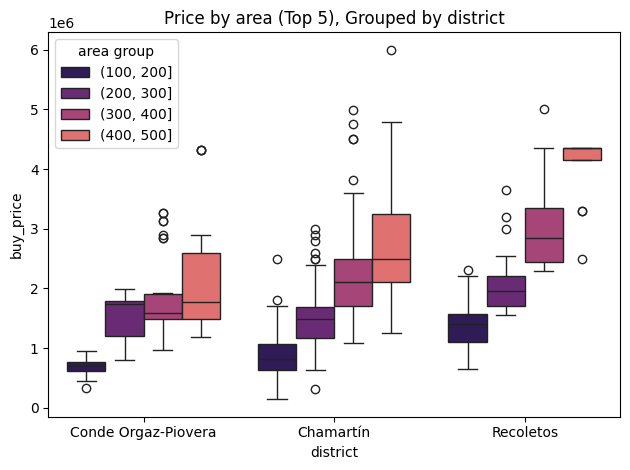

In [286]:
sns.boxplot(data=df_top, x= 'district', y='buy_price', hue= 'area_group')
plt.title('Price by area (Top 5), Grouped by district')
plt.legend(title='area group')
plt.tight_layout()
plt.show()
# Larger properties are generally more expensive across all three top districts.
# Recoletos has high prices even for smaller areas, suggesting a strong location premium.
# Chamartín shows the most price variation within each size group, while Conde Orgaz-Piovera follows a more consistent price pattern.

In [ ]:
#########################################################
#########################################################
#########################################################

In [ ]:
# Is built year affect on renewal or not?

In [287]:
df2= data[['built_year', 'is_renewal_needed']]

In [288]:
df2= df2.dropna(subset= ['built_year'])

In [289]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 21740
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   built_year         10000 non-null  float64
 1   is_renewal_needed  10000 non-null  bool   
dtypes: bool(1), float64(1)
memory usage: 166.0 KB


In [290]:
df2['built_year'] = df2['built_year'].astype('Int64') 
df2['built_year_date'] = pd.to_datetime(df2['built_year'], format='%Y', errors='coerce')

In [291]:
df2= df2[df2['built_year']< 2025]

In [292]:
df2['built_year'].min()

np.int64(1723)

In [353]:
df2['built_year'].max()

np.int64(2022)

In [294]:
df2['built_year'].value_counts().sort_index().head(10)

built_year
1723    1
1800    2
1810    1
1848    1
1850    9
1853    1
1860    8
1861    1
1866    1
1870    8
Name: count, dtype: Int64

In [295]:
df2.groupby('built_year')['is_renewal_needed'].mean().reset_index().head(10)

,built_year,is_renewal_needed
0,1723,0.00
1,1800,0.00
2,1810,0.00
3,1848,0.00
4,1850,0.33
5,1853,0.00
6,1860,0.38
7,1861,0.00
8,1866,0.00
9,1870,0.12


In [296]:
df_check = df2.groupby('built_year')['is_renewal_needed'].agg(
    count='count',
    renewal_rate='mean'
).reset_index()

In [297]:
df_filtered = df_check[df_check['count'] >= 4]  

px.line(df_filtered, x='built_year', y='renewal_rate', title='buildings ratio needed to renewal')

In [298]:
# The initial analysis showed unusual renovation rates across different built years — some old buildings had 0% need, while newer ones showed higher rates.
#After reviewing the data, we found that these irregular results were mostly from years with very few properties.
#Once we filtered out low-count years, a clear pattern appeared:
#Older buildings are more likely to need renovation.
# Deeper analysis may be required to understand fluctuations in some time periods.

In [299]:
################################################################
################################################################
################################################################

In [300]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21742 non-null  int64  
 1   sq_mt_built         21616 non-null  float64
 2   buy_price           21742 non-null  int64  
 3   n_floors            1437 non-null   float64
 4   floor               19135 non-null  object 
 5   is_floor_under      20572 non-null  object 
 6   has_lift            19356 non-null  object 
 7   is_exterior         18699 non-null  object 
 8   is_new_development  20750 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


In [301]:
df1.isnull().sum()

id                        0
sq_mt_built             126
buy_price                 0
n_floors              20305
floor                  2607
is_floor_under         1170
has_lift               2386
is_exterior            3043
is_new_development      992
dtype: int64

In [302]:
df1.sample(5)

,id,sq_mt_built,buy_price,n_floors,floor,is_floor_under,has_lift,is_exterior,is_new_development
18462,3280,159.00,940000,NaN,3,False,True,True,False
18770,2972,82.00,520000,NaN,1,False,True,True,False
16028,5714,92.00,395000,NaN,NaN,NaN,True,True,True
21648,94,260.00,1200000,NaN,3,False,True,True,False
13233,8509,103.00,259000,NaN,1,False,True,True,False


In [ ]:
# Deleting nan values from df1

In [303]:
df1.drop('n_floors', axis=1, inplace= True)

C:\Users\gamea\AppData\Local\Temp\ipykernel_2328\4165858195.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [304]:
df1= df1.dropna(subset= ['floor'])

In [305]:
df1= df1.dropna(subset= ['is_exterior'])

In [306]:
df1= df1.dropna(subset= ['is_new_development'])

In [307]:
df1= df1.dropna(subset= ['has_lift'])

In [308]:
df1= df1.dropna(subset= ['sq_mt_built'])

In [309]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17767 entries, 0 to 21739
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  17767 non-null  int64  
 1   sq_mt_built         17767 non-null  float64
 2   buy_price           17767 non-null  int64  
 3   floor               17767 non-null  object 
 4   is_floor_under      17767 non-null  object 
 5   has_lift            17767 non-null  object 
 6   is_exterior         17767 non-null  object 
 7   is_new_development  17767 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
# The selling price is for the presence of an elevator, with the space fixed and divided.

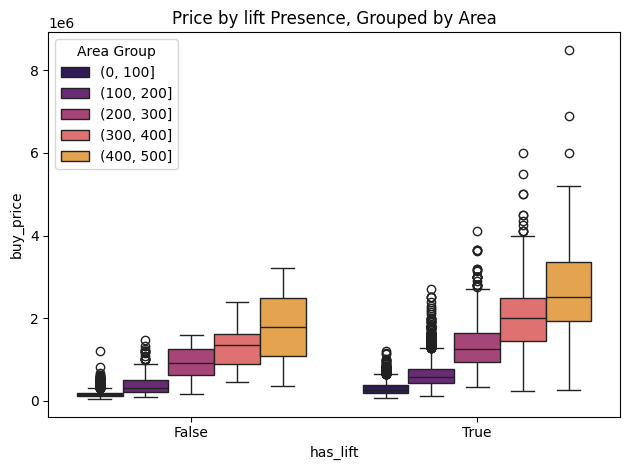

In [310]:
df1['area_group'] = pd.cut(df1['sq_mt_built'], bins=[0, 100, 200, 300, 400, 500])

sns.boxplot(data=df1, x='has_lift', y='buy_price', hue='area_group')
plt.title('Price by lift Presence, Grouped by Area')
plt.legend(title='Area Group')
plt.tight_layout()
plt.show()

In [311]:
# # The presence of an elevator increases property value across all floor area categories.
# The chart shows that the price distribution of properties without elevators is more prevalent.

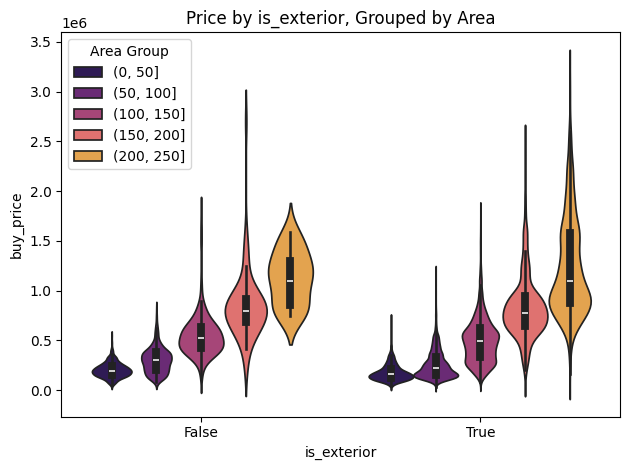

In [ ]:
# The selling price for the property is_exterior, with the area and division fixed
df1['area_group'] = pd.cut(df1['sq_mt_built'], bins=[0, 50, 100, 150, 200, 250])

sns.violinplot(data=df1, x='is_exterior', y='buy_price', hue='area_group')
plt.title('Price by is_exterior, Grouped by Area')
plt.legend(title='Area Group')
plt.tight_layout()
plt.show()

In [313]:
# Exterior properties (is_exterior=True) tend to have higher prices across all space categories.

In [315]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17767 entries, 0 to 21739
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  17767 non-null  int64   
 1   sq_mt_built         17767 non-null  float64 
 2   buy_price           17767 non-null  int64   
 3   floor               17767 non-null  object  
 4   is_floor_under      17767 non-null  object  
 5   has_lift            17767 non-null  object  
 6   is_exterior         17767 non-null  object  
 7   is_new_development  17767 non-null  object  
 8   area_group          16370 non-null  category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
cols = ['sq_mt_built', 'buy_price', 'is_floor_under', 
        'has_lift', 'is_exterior', 'is_new_development']
 # transforming the values into numeric values
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')

In [317]:
df1[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 17767 entries, 0 to 21739
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sq_mt_built         17767 non-null  float64
 1   buy_price           17767 non-null  int64  
 2   is_floor_under      17767 non-null  bool   
 3   has_lift            17767 non-null  bool   
 4   is_exterior         17767 non-null  bool   
 5   is_new_development  17767 non-null  bool   
dtypes: bool(4), float64(1), int64(1)
memory usage: 485.8 KB


In [318]:
df_corr = df1[cols].dropna()

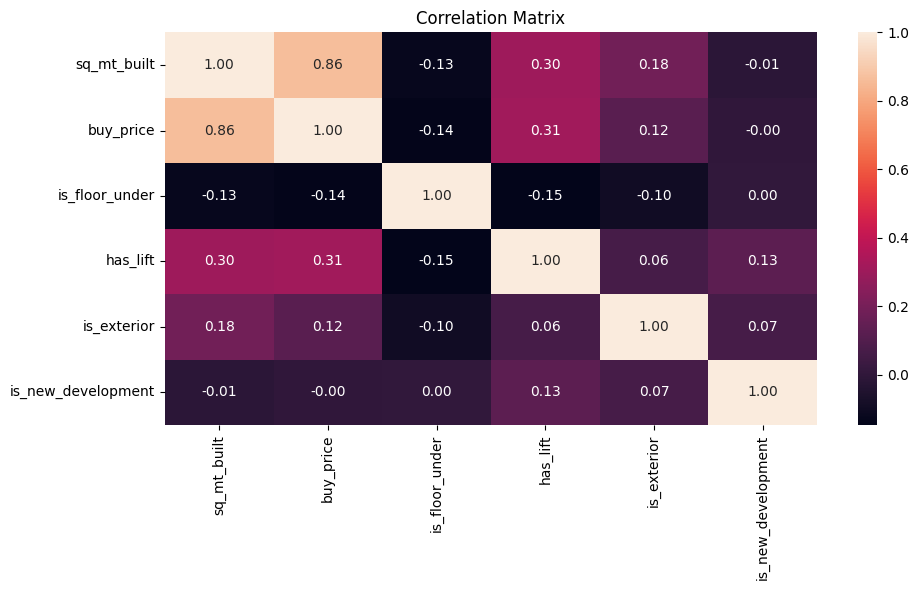

In [319]:
plt.figure(figsize=(10, 6))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
# sq_mt_built has the strongest positive correlation with buy_price (+0.86).
# has_lift shows a moderate positive correlation with buy_price (+0.31)
# is_floor_under has a negative correlation with buy_price (−0.14).
# is_exterior has a weak positive correlation with buy_price (+0.12).
# is_new_development shows almost no correlation with buy_price (0.00).

In [ ]:
# Making a new data fram to tansfere it ito CSC to make it workable in SQL after cleanup

In [334]:
df_combined = pd.merge(
    df,
    df1.drop(columns=['sq_mt_built', 'buy_price']), 
    on='id',
    how='left'
)


In [335]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9730 entries, 0 to 9729
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9730 non-null   int64         
 1   title               9730 non-null   object        
 2   city                9730 non-null   object        
 3   sq_mt_built         9730 non-null   float64       
 4   n_rooms             9730 non-null   int64         
 5   n_bathrooms         9730 non-null   float64       
 6   buy_price           9730 non-null   int64         
 7   buy_price_by_area   9730 non-null   int64         
 8   house_type_id       9730 non-null   object        
 9   is_renewal_needed   9730 non-null   bool          
 10  built_year          9730 non-null   Int64         
 11  has_parking         9730 non-null   bool          
 12  district            9730 non-null   object        
 13  price_category      9730 non-null   category    